# Part 3: Vector Data Analysis using GeoPandas

With shapely we can perform geospatial operations on single features, but in a normal geospatial analysis we have to perform such operations on whole layers. Within GIS software (e.g. QGIS) vector layers are usually represented as attribute tables with associated geometries. 

In Python, analyses based on tables are performed using the package `Pandas`. The extention of it for geospatial analyses is called `GeoPandas`. In this notebook you will learn how to perform spatial analyses on vector data using these two packages. 

The exercises are posed in such a way that you have to refer to the documentation of the packages to find out how the methods are used:

&rarr; [Pandas API Reference](https://pandas.pydata.org/docs/reference/index.html)  
&rarr; [GeoPandas API Reference](https://geopandas.org/reference.html)  
&rarr; [GeoPandas User Guide](https://geopandas.org/)  

### Additional Python packages
For this assignment you will need to install the additional python package mplleaflet. 

`conda install mplleaflet`

### Data set: Crowed-Sourced information on bike safety in Heidelberg
Within this notebook we will analyse the data which was collected during the last mobile mapping event of the [disaster mappers HD](https://disastermappers.wordpress.com/). The task of the participants was to map and assess bike safety in Heidelberg. The results were published on [Mobile Mapping: “Nachhaltige Mobilität in Heidelberg”](https://redfrexx.github.io/mobilemapping_hd/). If you like, you can also add data by submitting it through this [Kobo survey](https://ee.kobotoolbox.org/x/ZZ1fUFa1).

After two brief introuctions to Pandas and GeoPandas, we will analyze the following questions in regard to the data set:
* Who participated in the mapping event?
* How was bike safety perceived in Heidelberg?
* Are there differences in the perceived bike safety between the districts of Heidelberg? 
* Are large streets perceived to be more dangerous than small ones? 

In the end you will perform your own analysis. 

## 1 Introduction to  `Pandas`

The collected data on bike safety is contained in a `csv` file without explicit spatial information. Therefore, we will use pandas to read the data. 

&rarr; __Please go through the user guide [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) for a more detailed introduction.__

In [1]:
import pandas as pd

In [2]:
bike_safety_file = "./data/heidelberger_radwege_umfrage_2.csv"

In [3]:
data = pd.read_csv(bike_safety_file)

To see if the import worked correctly, you can display the first 5 rows of the data set using the `head()` method. 

In [4]:
data.head()

,deviceid,lat,lon,precision,Wie gut findest du den Radweg?,Wie gut findest du die technische Ausstattung der Radinfrastruktur?,Ausstattung,Bauliche oder markierte Trennung zu FußgängerInnen,Bauliche oder markierte Trennung von Autos,Bordsteinabsenkungen,...,Wie ist dein generelles Fahrgefühl hier?,Einflüsse:,"Fahrfluss (z.B. grüner Pfeil für Radfahrende, Fahrradampel, ...)",Luftqualität,Lärmbelastung,Begrünung,Übersichtlichkeit,Beschattung,Gibt es zusätzliche Einflussfaktoren auf das Fahrgefühl?,submission_date
0,3,49.431396,8.668345,14.995,gut,tendenziell eher schlecht,-,gut,schlecht,-,...,gut,-,-,-,-,-,-,-,-,2020-05-22
1,2,49.378628,8.662513,0.000,tendenziell eher schlecht,tendenziell eher schlecht,-,-,-,schlecht,...,sehr schlecht,-,-,-,schlecht,-,-,-,-,2020-05-22
2,4,49.393539,8.676201,0.000,schlecht,sehr schlecht,-,schlecht,schlecht,schlecht,...,schlecht,-,neutral,neutral,neutral,schlecht,-,neutral,-,2020-05-22
3,5,49.389133,8.683078,13.966,tendenziell eher schlecht,tendenziell eher gut,-,schlecht,gut,-,...,tendenziell eher gut,-,-,gut,gut,gut,schlecht,-,Unübersichtliche Kreuzung von fahrradwegen,2020-05-22
4,6,49.426220,8.683111,0.000,sehr schlecht,sehr schlecht,-,neutral,schlecht,neutral,...,sehr schlecht,-,schlecht,schlecht,schlecht,neutral,schlecht,neutral,Unsicherheit aufgrund schlechter Markierungen....,2020-05-22


In pandas, data is stored in `DataFrame` or `Series` objects. 

In [5]:
type(data)

pandas.core.frame.DataFrame

A series is basically a dataframe with just one column. So when we select the column "lat" of our dataframe we get a `Series`.

In [6]:
type(data["lat"])

pandas.core.series.Series

You can also create a new DataFrame from multiple Series or lists

In [7]:
new_df = pd.DataFrame({"lat": data.lat, "lon": data.lon})

### Pandas is based on NumPy.

A Pandas DataFrame object can be thought of as a __NumPy array with labels for rows and columns__. 

In [8]:
data.to_numpy()

array([[3, 49.431396484375, 8.66834545135498, ..., '-', '-',
        '2020-05-22'],
       [2, 49.37862777709961, 8.66251277923584, ..., '-', '-',
        '2020-05-22'],
       [4, 49.39353942871094, 8.676200866699219, ..., 'neutral', '-',
        '2020-05-22'],
       ...,
       [15, 49.407691955566406, 8.694391250610352, ..., 'neutral', '-',
        '2020-05-26'],
       [16, 49.3948860168457, 8.689634323120117, ..., 'neutral', '-',
        '2020-05-26'],
       [17, 49.38019561767578, 8.692331314086914, ..., '-', '-',
        '2020-05-27']], dtype=object)

In [9]:
data.columns

Index(['deviceid', 'lat', 'lon', 'precision', 'Wie gut findest du den Radweg?',
       'Wie gut findest du die technische Ausstattung der Radinfrastruktur?',
       'Ausstattung', 'Bauliche oder markierte Trennung zu FußgängerInnen',
       'Bauliche oder markierte Trennung von Autos', 'Bordsteinabsenkungen',
       'Beleuchtung', 'Radwegbelag', 'Radwegmarkierung', 'Radwegbreite',
       'Rote Markierung an Kreuzungen',
       'Gibt es eine zusätzliche technische Ausstattung?',
       'Wie ist dein generelles Sicherheitsgefühl hier?', 'Gefahren:',
       'Sichtbarkeit für AutofahrerInnen', 'Abstand zu Autos',
       'Abstand zu FußgängerInnen', 'Angemessene Geschwindigkeit der Autos',
       'Gibt es eine zusätzliche Gefahrenquelle? ',
       'Wie ist dein generelles Fahrgefühl hier?', 'Einflüsse:',
       'Fahrfluss (z.B. grüner Pfeil für Radfahrende, Fahrradampel, ...)',
       'Luftqualität', 'Lärmbelastung', 'Begrünung', 'Übersichtlichkeit',
       'Beschattung',
       'Gibt es zu

The `index` method return the row names. 

In [10]:
data.index

RangeIndex(start=0, stop=174, step=1)

Since it is based on numpy, it shares some methods with it, e.g. the `shape`.

In [11]:
data.shape

(174, 33)

However, in contrast to a regular NumPy array, a DataFrame can hold different data types. 


In [12]:
data.dtypes

deviceid                                                                 int64
lat                                                                    float64
lon                                                                    float64
precision                                                              float64
Wie gut findest du den Radweg?                                          object
Wie gut findest du die technische Ausstattung der Radinfrastruktur?     object
Ausstattung                                                             object
Bauliche oder markierte Trennung zu FußgängerInnen                      object
Bauliche oder markierte Trennung von Autos                              object
Bordsteinabsenkungen                                                    object
Beleuchtung                                                             object
Radwegbelag                                                             object
Radwegmarkierung                                    

You can change them using the `astype()` method. 

In [13]:
data = data.astype({'lat': 'float32', 'lon': 'float32', 'precision': 'float32'})

Using the `index` and `columns` of a DataFrame object you can select subsets of the data.

### Slicing dataframes
Slicing (i.e. selecting data) is done using the `.loc` method.

#### Slicing based on rows
You can select rows by their name (i.e. the index). In our case the index is just a range of numbers. 

In [14]:
data.loc[0:3] # You can also leave out the 0 to get the same result, as in numpy

,deviceid,lat,lon,precision,Wie gut findest du den Radweg?,Wie gut findest du die technische Ausstattung der Radinfrastruktur?,Ausstattung,Bauliche oder markierte Trennung zu FußgängerInnen,Bauliche oder markierte Trennung von Autos,Bordsteinabsenkungen,...,Wie ist dein generelles Fahrgefühl hier?,Einflüsse:,"Fahrfluss (z.B. grüner Pfeil für Radfahrende, Fahrradampel, ...)",Luftqualität,Lärmbelastung,Begrünung,Übersichtlichkeit,Beschattung,Gibt es zusätzliche Einflussfaktoren auf das Fahrgefühl?,submission_date
0,3,49.431396,8.668345,14.995,gut,tendenziell eher schlecht,-,gut,schlecht,-,...,gut,-,-,-,-,-,-,-,-,2020-05-22
1,2,49.378628,8.662513,0.000,tendenziell eher schlecht,tendenziell eher schlecht,-,-,-,schlecht,...,sehr schlecht,-,-,-,schlecht,-,-,-,-,2020-05-22
2,4,49.393539,8.676201,0.000,schlecht,sehr schlecht,-,schlecht,schlecht,schlecht,...,schlecht,-,neutral,neutral,neutral,schlecht,-,neutral,-,2020-05-22
3,5,49.389133,8.683078,13.966,tendenziell eher schlecht,tendenziell eher gut,-,schlecht,gut,-,...,tendenziell eher gut,-,-,gut,gut,gut,schlecht,-,Unübersichtliche Kreuzung von fahrradwegen,2020-05-22


#### Slicing based on columns

When you select columns, you also need to indicate the rows which you would like to select. `:` means that all rows or columns are selected.

In [15]:
data.loc[:, ["lat", "lon"]] # You can also leave out the 0 to get the same result

,lat,lon
0,49.431396,8.668345
1,49.378628,8.662513
2,49.393539,8.676201
3,49.389133,8.683078
4,49.426220,8.683111
...,...,...
169,49.409451,8.702234
170,49.413391,8.705764
171,49.407692,8.694391
172,49.394886,8.689634


#### Selecting a single column
You can select columns based on their labels. 

In [16]:
data.lat # or data["lat"]

0      49.431396
1      49.378628
2      49.393539
3      49.389133
4      49.426220
         ...    
169    49.409451
170    49.413391
171    49.407692
172    49.394886
173    49.380196
Name: lat, Length: 174, dtype: float32

#### Selecting based on attribute value

Selecting all points created by the contributor with the device id 1. 

In [17]:
data.loc[data["deviceid"] == 1]

,deviceid,lat,lon,precision,Wie gut findest du den Radweg?,Wie gut findest du die technische Ausstattung der Radinfrastruktur?,Ausstattung,Bauliche oder markierte Trennung zu FußgängerInnen,Bauliche oder markierte Trennung von Autos,Bordsteinabsenkungen,...,Wie ist dein generelles Fahrgefühl hier?,Einflüsse:,"Fahrfluss (z.B. grüner Pfeil für Radfahrende, Fahrradampel, ...)",Luftqualität,Lärmbelastung,Begrünung,Übersichtlichkeit,Beschattung,Gibt es zusätzliche Einflussfaktoren auf das Fahrgefühl?,submission_date
16,1,49.380730,8.675289,9.982532,tendenziell eher gut,tendenziell eher gut,-,schlecht,schlecht,gut,...,tendenziell eher gut,-,neutral,neutral,neutral,neutral,schlecht,schlecht,-,2020-05-22
21,1,49.382458,8.675556,12.146921,schlecht,sehr schlecht,-,schlecht,schlecht,gut,...,schlecht,-,neutral,neutral,neutral,gut,schlecht,neutral,-,2020-05-22
30,1,49.385345,8.676005,10.806641,sehr gut,sehr gut,-,neutral,gut,gut,...,sehr gut,-,gut,gut,gut,gut,gut,gut,-,2020-05-22
47,1,49.389282,8.676892,14.260504,schlecht,schlecht,-,schlecht,schlecht,gut,...,tendenziell eher schlecht,-,gut,gut,gut,gut,schlecht,gut,-,2020-05-22
72,1,49.393993,8.676526,16.376478,schlecht,schlecht,-,gut,schlecht,schlecht,...,tendenziell eher schlecht,-,schlecht,schlecht,schlecht,schlecht,schlecht,schlecht,-,2020-05-22
74,1,49.396015,8.677700,37.099487,schlecht,schlecht,-,schlecht,gut,neutral,...,tendenziell eher schlecht,-,-,-,-,-,-,-,-,2020-05-22
81,1,49.398140,8.679138,13.139303,tendenziell eher gut,tendenziell eher schlecht,-,schlecht,gut,gut,...,tendenziell eher schlecht,-,schlecht,-,-,-,schlecht,-,-,2020-05-22
90,1,49.400078,8.677968,13.749800,gut,gut,-,gut,gut,gut,...,tendenziell eher gut,-,schlecht,schlecht,schlecht,gut,neutral,schlecht,-,2020-05-22
96,1,49.402153,8.679928,15.801072,tendenziell eher gut,tendenziell eher gut,-,gut,neutral,gut,...,schlecht,-,schlecht,schlecht,schlecht,schlecht,schlecht,schlecht,-,2020-05-22
109,1,49.407730,8.676698,13.704102,gut,gut,-,gut,gut,gut,...,schlecht,-,schlecht,schlecht,schlecht,schlecht,neutral,neutral,-,2020-05-22


There are many many more functions, methods worth exploring.

&rarr; __Refer to the Pandas documentation on [Indexing and Slicing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) for more details.__

&rarr; It is also worth exploring the [Advanced Slicing and Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)

### Calculating statistics using NumPy's ufuncs 

Since Pandas dataFrames are based on NumPy arrays, they also support method for [descriptive statistics](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#descriptive-statistics).

In [18]:
data.mean()

C:\ProgramData\Anaconda3\envs\advgeo\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


deviceid      7.086207
lat          49.412430
lon           8.677152
precision    30.731546
dtype: float64

__E 1.1:__ The above expression calculates the mean along the columns. How can you calculate the mean along the rows? (The result wouldn't make sense in this case, just for demonstration purposes)

In [19]:
data_transposed = data.transpose(copy=True)
data_transposed.mean()

C:\ProgramData\Anaconda3\envs\advgeo\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Series([], dtype: float64)

__E 1.2:__ How can you calculate the mean along a certain column, e.g. 'precision'? 

In [20]:
data.precision.mean()

30.73154640197754

__E 1.3:__ Get all unique entries of the colum `submission_date`. 

In [21]:
data.submission_date.unique()

array(['2020-05-22', '2020-05-26', '2020-05-27'], dtype=object)

## 2  Introduction to `GeoPandas`

If we want to perform spatial operations and display the data on a map, we need to convert the pandas DataFrame into a GeoDataFrame. 

GeoPandas is basically an extention of the Pandas package by adding a geometry column to the data frame and enabling spatial operations on the whole layer. For this GeoPandas relies on shapely. By the way, for reading data it relies on fiona.  

&rarr; Refer to the [GeoPandas User Guide](https://geopandas.org/) for more details. 

### Adding a geometry column 
Geopandas expects the spatial information of a row in the column called 'geometry'. Therefore, we will create a new column called `geometry` and fill each cell with a new `shapely.Point()` object which is created from the longitude (lat) and latitute (lat) values of the respective row.

In [22]:
from shapely.geometry import Point

In [23]:
data["geometry"] = data.apply(lambda x: Point(x["lon"], x["lat"]), axis=1)

### Converting it to a `GeoDataFrame`

In [24]:
import geopandas as gpd

The GeoDataFrame needs a crs attributes which specifies the crs the geometery is given in. 

In [25]:
data = gpd.GeoDataFrame(data)
data.crs = {"init": "epsg:4326"}
type(data)

C:\ProgramData\Anaconda3\envs\advgeo\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


geopandas.geodataframe.GeoDataFrame

### Creating a map
We can also plot the data with geopandas, but we need to enable matplotlib within jupyter using the magic command `%matplotlib inline`.

For plotting maps we need matplotlib. Using the `figsize()` function you  can adjust the figure size within the notebook. 

In [26]:
import matplotlib as mpl
from IPython.core.pylabtools import figsize # adjusts the figure size in notebook 
%matplotlib inline

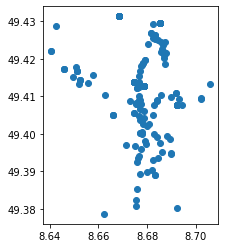

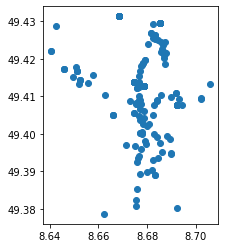

In [27]:
data.plot()
ax = data.plot()

A little context would be helpful. Let's add a basemap using `mplleaflet`.

In [28]:
import mplleaflet

In [29]:
figsize(10, 10)
data.plot()
mplleaflet.display()
#mplleaflet.display(fig=ax.figure, crs=data.crs)

AttributeError: 'XAxis' object has no attribute '_gridOnMajor'

## 3 Who participated in the mapping event?

Now that the data is in the right format, we can start with the data analysis. First, we want to know who has participated in the mapping event. 

&rarr; So solve the following exercises, __refer to the [pandas reference](https://pandas.pydata.org/pandas-docs/stable/reference/)__ to find the right methods.

__E 3.1:__ Calculate the number of contributed points. 

In [45]:
len(data)

174

__E 3.2:__ Calculate the number of contributors (i.e. how many people participated)

In [44]:
len(data.deviceid.unique())

17

__E 3.3:__ Calculate the number of points per contributor. Hint: Take a look at the method `value_counts` of the pandas dataframe.

In [48]:
data.deviceid.value_counts()

3     32
9     32
8     29
1     15
7     13
5      8
6      7
10     7
11     7
14     6
4      4
12     4
15     4
13     3
2      1
16     1
17     1
Name: deviceid, dtype: int64

__E 3.4:__ Calculate the mean and median number of points per contributor.

In [49]:
data.deviceid.value_counts().mean()

10.235294117647058

In [50]:
data.deviceid.value_counts().median()

7.0

__E 3.5:__ How many nodata values are contained in the columns? Cells without information by the contributor (i.e. nodata) are marked with a dash ('-'). Replace the '-' with `np.nan` and then count the sum of no data cells in each column.

__Hint:__ Useful methods are `replace()`, `isna()` and `sum()`

You will need numpy now, since we are using np.nan. 

In [51]:
import numpy as np

In [56]:
data_old = data.copy()
data = data.replace(to_replace='-', value=np.nan)
data.isna().sum()

deviceid                                                                 0
lat                                                                      0
lon                                                                      0
precision                                                                0
Wie gut findest du den Radweg?                                           0
Wie gut findest du die technische Ausstattung der Radinfrastruktur?      1
Ausstattung                                                            174
Bauliche oder markierte Trennung zu FußgängerInnen                      18
Bauliche oder markierte Trennung von Autos                              18
Bordsteinabsenkungen                                                    35
Beleuchtung                                                             26
Radwegbelag                                                             42
Radwegmarkierung                                                        19
Radwegbreite             

#### Precision
Next to the lat and lon column there is column called `precision`. This indicates the precision of the GPS measurement of the mobile device. Let's see how precise the points are. 

__E 3.6:__ Calculate the mean, median and 90th percentile of the precision. 

In [57]:
data.precision.mean()

30.73154640197754

In [58]:
data.precision.median()

15.038000106811523

In [59]:
data.precision.quantile(q=0.9)

25.566999435424805

__E 3.7:__ Plot a histogram of the `precision` column. __Hint:__ Use the `GeoDataFrame.hist()` method. 

array([[<AxesSubplot:title={'center':'precision'}>]], dtype=object)

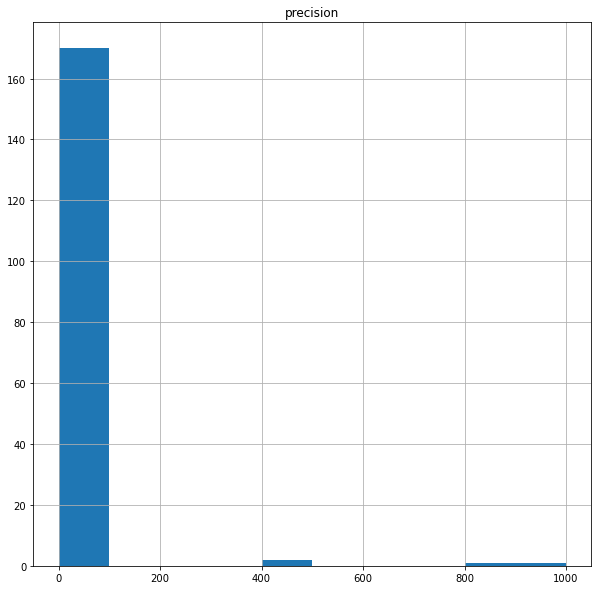

In [61]:
data.hist(column='precision')


__E 3.7:__ There seem to be some points with high uncertainty in the GPS measurements. Let's take a look at them. Select all points whose precision is larger than 40 meters. 

In [64]:
data_uncertain = data.loc[data["precision"] > 40]
data_uncertain

,deviceid,lat,lon,precision,Wie gut findest du den Radweg?,Wie gut findest du die technische Ausstattung der Radinfrastruktur?,Ausstattung,Bauliche oder markierte Trennung zu FußgängerInnen,Bauliche oder markierte Trennung von Autos,Bordsteinabsenkungen,...,Einflüsse:,"Fahrfluss (z.B. grüner Pfeil für Radfahrende, Fahrradampel, ...)",Luftqualität,Lärmbelastung,Begrünung,Übersichtlichkeit,Beschattung,Gibt es zusätzliche Einflussfaktoren auf das Fahrgefühl?,submission_date,geometry
5,5,49.393040,8.682407,899.999023,schlecht,schlecht,NaN,schlecht,schlecht,NaN,...,NaN,NaN,gut,gut,neutral,gut,NaN,NaN,2020-05-22,POINT (8.68241 49.39304)
7,5,49.393532,8.684679,459.657990,tendenziell eher schlecht,tendenziell eher schlecht,NaN,neutral,gut,neutral,...,NaN,NaN,schlecht,schlecht,schlecht,gut,NaN,NaN,2020-05-22,POINT (8.68468 49.39353)
9,3,49.408028,8.675391,57.666000,tendenziell eher gut,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-22,POINT (8.67539 49.40803)
17,8,49.412319,8.675887,42.577000,sehr schlecht,sehr schlecht,NaN,neutral,gut,schlecht,...,NaN,schlecht,schlecht,schlecht,neutral,schlecht,gut,NaN,2020-05-22,POINT (8.67589 49.41232)
24,8,49.412319,8.675887,42.577000,schlecht,tendenziell eher schlecht,NaN,neutral,schlecht,gut,...,NaN,gut,neutral,neutral,gut,schlecht,neutral,NaN,2020-05-22,POINT (8.67589 49.41232)
36,7,49.422024,8.640544,40.224998,gut,gut,NaN,schlecht,gut,schlecht,...,NaN,NaN,schlecht,schlecht,schlecht,NaN,schlecht,NaN,2020-05-22,POINT (8.64054 49.42202)
37,7,49.422024,8.640544,40.224998,gut,tendenziell eher gut,NaN,gut,gut,gut,...,NaN,gut,schlecht,schlecht,schlecht,neutral,schlecht,NaN,2020-05-22,POINT (8.64054 49.42202)
68,5,49.399193,8.684113,409.707001,tendenziell eher schlecht,tendenziell eher schlecht,NaN,neutral,gut,schlecht,...,NaN,NaN,neutral,schlecht,neutral,schlecht,gut,NaN,2020-05-22,POINT (8.68411 49.39919)
123,14,49.415684,8.657790,1000.000000,tendenziell eher gut,tendenziell eher gut,NaN,gut,neutral,gut,...,NaN,gut,schlecht,schlecht,gut,gut,neutral,NaN,2020-05-22,POINT (8.65779 49.41568)


__E 3.8:__ Plot the uncertain points on a map. 

<AxesSubplot:>

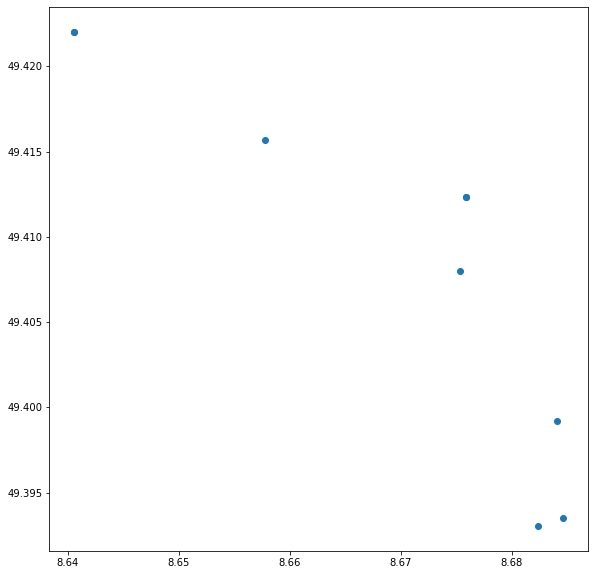

In [66]:
figsize(10, 10)
data_uncertain.plot()
#mplleaflet.display()

__E 3.9:__ Was there one specific device from which the uncertain GPS measurements originated or were they distributed among several devices?

In [67]:
data_uncertain.deviceid.unique()

array([ 5,  3,  8,  7, 14], dtype=int64)

__E 3.10.:__ For the remaining analysis we want to explude these uncertain points. Remove all points from the dataframe `data` whose precision is larger than 40 meters. 

In [72]:
data_all = data.copy()
data = data.loc[data["precision"] < 40]

,deviceid,lat,lon,precision,Wie gut findest du den Radweg?,Wie gut findest du die technische Ausstattung der Radinfrastruktur?,Ausstattung,Bauliche oder markierte Trennung zu FußgängerInnen,Bauliche oder markierte Trennung von Autos,Bordsteinabsenkungen,...,Einflüsse:,"Fahrfluss (z.B. grüner Pfeil für Radfahrende, Fahrradampel, ...)",Luftqualität,Lärmbelastung,Begrünung,Übersichtlichkeit,Beschattung,Gibt es zusätzliche Einflussfaktoren auf das Fahrgefühl?,submission_date,geometry
0,3,49.431396,8.668345,14.995,gut,tendenziell eher schlecht,NaN,gut,schlecht,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-22,POINT (8.66835 49.43140)
1,2,49.378628,8.662513,0.000,tendenziell eher schlecht,tendenziell eher schlecht,NaN,NaN,NaN,schlecht,...,NaN,NaN,NaN,schlecht,NaN,NaN,NaN,NaN,2020-05-22,POINT (8.66251 49.37863)
2,4,49.393539,8.676201,0.000,schlecht,sehr schlecht,NaN,schlecht,schlecht,schlecht,...,NaN,neutral,neutral,neutral,schlecht,NaN,neutral,NaN,2020-05-22,POINT (8.67620 49.39354)
3,5,49.389133,8.683078,13.966,tendenziell eher schlecht,tendenziell eher gut,NaN,schlecht,gut,NaN,...,NaN,NaN,gut,gut,gut,schlecht,NaN,Unübersichtliche Kreuzung von fahrradwegen,2020-05-22,POINT (8.68308 49.38913)
4,6,49.426220,8.683111,0.000,sehr schlecht,sehr schlecht,NaN,neutral,schlecht,neutral,...,NaN,schlecht,schlecht,schlecht,neutral,schlecht,neutral,Unsicherheit aufgrund schlechter Markierungen....,2020-05-22,POINT (8.68311 49.42622)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,15,49.409451,8.702234,0.000,gut,gut,NaN,gut,neutral,gut,...,NaN,gut,gut,gut,neutral,neutral,gut,NaN,2020-05-26,POINT (8.70223 49.40945)
170,15,49.413391,8.705764,0.000,gut,gut,NaN,schlecht,gut,gut,...,NaN,neutral,neutral,neutral,gut,neutral,neutral,NaN,2020-05-26,POINT (8.70576 49.41339)
171,15,49.407692,8.694391,0.000,sehr gut,sehr gut,NaN,gut,gut,gut,...,NaN,neutral,neutral,neutral,gut,gut,neutral,NaN,2020-05-26,POINT (8.69439 49.40769)
172,16,49.394886,8.689634,0.000,tendenziell eher gut,tendenziell eher gut,NaN,gut,gut,gut,...,NaN,NaN,gut,NaN,gut,neutral,neutral,NaN,2020-05-26,POINT (8.68963 49.39489)


## 4 How is bike safety perceived in Heidelberg?

Now let's look at the collected data itself. We are only going to classify the main criteria for now: 
* 'Wie gut findest du den Radweg?'
* 'Wie gut findest du die technische Ausstattung der Radinfrastruktur?'
* 'Wie ist dein generelles Sicherheitsgefühl hier?'
* 'Wie ist dein generelles Fahrgefühl hier?'

### Exploring the main criteria

__E 4.1:__ The ratings are given as strings and are therefore not well suitable for statistical analysis. Reclassify them to numeric values of the range 1 (sehr gut) to 6 (sehr schlecht). Save the result to a new dataframe called `data_num`.

__Hint:__ Use the method `.replace()`

In [ ]:
reclass_dict = {"sehr gut": 1, "gut": 2, "tendenziell eher gut": 3, "tendenziell eher schlecht":4, 
               "schlecht": 5, "sehr schlecht":6, 'tendenziell eher  schlecht':4, "-": np.nan, "neutral": 3}

__E 4.2:__ The column names are quite long, which makes it a bit cumbersome to slice the dataframe by column names. Rename the columns of the `data_num` dataframe according to this dictionary. 

__Hint:__ Use the method `.rename()`

In [ ]:
column_dict = {'Wie gut findest du den Radweg?': "Allgemein", 
              'Wie gut findest du die technische Ausstattung der Radinfrastruktur?': "Technische Ausstattung",
              'Wie ist dein generelles Sicherheitsgefühl hier?': "Sicherheitsgefühl",
              'Wie ist dein generelles Fahrgefühl hier?': "Fahrgefühl"}

__E 4.3:__ Create a dataframe object called `main_criteria` which contains only the 4 main criteria, i.e. the 4 columns we just renamed.

__Hint:__ You can convert the GeoDataFrame to a normal DataFrame now, since we got rid of the geometry column anyways. 

__E 4.4:__ Calculate the mean and standard deviation of the rating of each criteria

__E 4.5:__ Calculate a correclation matrix between all columns. 
    
__Hint:__ Use the method `.corr()`

Do you see any patterns? 

In [ ]:
# your answer here

__E 4.6:__ What is the mean rating of each criteria per contributor? Join the column "deviceid" to the `main_criteria` data frame using the `DataFrame.join()` method.

&rarr; For joining tables, take a look at the section [Merge, join, concatenate and compare](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

Then group the rows by `deviceid` using the `groupby()` method. 

&rarr; For grouping take a look at the section [Group by: split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

__E 4.7:__ Create a boxplot showing the distribution of ratings of each main criteria. 

&rarr; Take a look at [Pandas Visualizations](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

__Question:__ What is the oveall perception of bike safety in Heidelberg? Are there any relationships between the 4 main criteria that were surveyed?

__Answer:__

## 5 Are there differences in the perceived bike safety between the districts of Heidelberg? 

From the map we can see that the points are not evenly distributed across Heidelberg. So let's aggregate the data based on the districts of Heidelberg.

__E 5.1:__ Read the following file containing the districts of Heidelberg into a variable called `districts`. What's the coordinate reference system of dataframe? 

In [ ]:
districts_hd_file = "./data/districts_hd.geojson"

__E 5.2:__ We only need the columns 'geometry' and 'Stadtteil'. Remove all other columns dataframe. 

__E 5.3:__ Perform a spatial join between the dataframe `data_num` and the districts. Save it to a new variables called `data_with_district`.

&rarr; Take a look at the [GeoPandas User Manual on Spatial Joins](https://geopandas.org/mergingdata.html#spatial-joins).

__E 5.4:__ Calculate the number of point per district. 

__E 5.5:__ Create a pie chart showing the number of points per district. 

&rarr; Take a look at &rarr; [Pandas Visualizations](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

__E 5.6:__ Calculate the number of contributors per district. 

__E 5.7:__ Create a horizontal bar chart showing the number of contributors per district. Sort the dataframe by the column "deviceid" ( `.sort_values()`) before plotting so that they are shown in descending order. 

&rarr; Take a look at [Pandas Visualizations](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) to find the method to create a horizontal barplot. 

__E 5.8:__ Create a boxplot showing the rating "Allgemein" across all districts. Join the dataframes `main_criteria` and `data_with_district["Stadtteil"]`. Afterwards create a boxplot using the method `DataFrame.boxplot()`.

__Question:__ 
1. Which differences do you see in the number of contributors, the number of points and the perceived bike safety? 
2. How reliable are these findings based on the collected data?

__Answer:__ 

## 6 Are large streets perceived to be more dangerous than small ones? 

On the map it seems like points located close to the main streets show worse ratings than others. We will analyze this by calculating the distance to main streets extracted from OpenStreetMap. 

### Read OpenStreetMap streets

__E 6.1:__ Read the data set "streets.geojson" into a dataframe called `streets`.

In [ ]:
streets_file = "./data/streets.geojson"

__E 6.2:__ Select all streets which contain the tag highway = primary. 

### Calculate distance to streets
__E 6.3:__ We want to get the distance to the streets in meters. What is the coordinate references system of the geodataframes `data_num` and `streets`? Convert them to the crs with the EPSG:32632. 

__Hint:__ Some methods of Pandas (and GeoPandas) provide the parameter `inplace`. If you set `inplace=true`, the dataframe object itself will be changed and the method does not return any value. It is basically overriding the dataframe. So `dataframe.to_crs(..., inplace=True)` yields the same as `dataframe = dataframe.to_crs(...)`

__E 6.4:__ Calculate the distance from each point to the next primary street using the `distance()` method. 
    
__Hint:__ It might be necessary to unionize the streets first using `cascaded_union`.

__E 6.5:__ Plot a choropleth map showing the points and their distance visualized using a color map. 

__Hint:__ If you want to use the mplleaflet.display() to plot a basemap your dataframe needs to have EPSG:4326.

&rarr; Take a look at the [GeoPandas User Guide on Choropleth Maps](https://geopandas.org/mapping.html#choropleth-maps)

__E 6.6:__ Create boxplots showing the distances for each rating category. Answer the question: 

__E 6.7:__ Compute the same for the distance to streets with the tag highway=secondary and highway=tertiary.

__Question:__ Do you an influence on the safety rating based on the different street types? Are larger streets perceived as more dangerous? 

__Answer:__ 

## 7 Your Analyses

__E 7.1:__ Come up with one more geographic question and answer it using pandas and geopandas methods. 

__E 7.2:__ Go through the [GeoPandas](https://geopandas.org/) User guide and [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html) User guides to find three more methods which we haven't applied in this analysis so far, e.g. MultiIndex, overlay, dissolve, attribute join, etc. Apply them to the data sets.